Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
Копылов Артем Александрович

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
pip install requests

In [ ]:
import datetime
from requests import get


def get_request(url):
    req = get(url)
    if req.status_code == 200:
        return req.json()
    return None

def get_weather_code_message(weather_code):
    if weather_code in [0, 1]:
        return 'нет осадков, ясно'

    if weather_code in [45]:
        return 'нет осадков, туман'

    if weather_code in [61, 63, 65, 71, 73, 75]:
        return 'есть осадки, нет тумана'

    return ''


def generate_message(data):
    curr_date = datetime.datetime.today().date()
    curr_date = f'{curr_date.day}.{curr_date.month}'

    print(data['current'])

    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']

    weather_code = data['current']['weather_code']

    message = get_weather_code_message(weather_code)

    return f'Сегодня ({curr_date}) погода {temperature} {temperature_format}, {message}'


def get_weather(latitude, longitude):
    data = get_request(f'https://api.open-meteo.com/v1/forecast/?latitude={latitude}&longitude={longitude}&current=temperature_2m,weather_code&forecast_days=1')
    return generate_message(data)

latitude, longitude = [float(i) for i in input().split(', ')]
print(get_weather(latitude, longitude))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests


def get_pokemons():
    res = requests.get('https://pokeapi.co/api/v2/pokemon')
    return res.json()


def get_pokemon_info(name):
    res = requests.get('https://pokeapi.co/api/v2/pokemon/'+name)
    return res.json()


def show_names(pokemons):
    names = [i['name'] for i in pokemons['results']]
    print(', '.join(names))


def show_pokemon(pokemon):
    print('Name:', pokemon.get('name'))
    print('Type:', ', '.join([i['type']['name'] for i in pokemon.get('types')]))
    print('Weight:', pokemon.get('weight'))
    print('Height:', pokemon.get('height'))
    print('Abilities:', ', '.join([i['ability']['name'] for i in pokemon.get('abilities')]))


show_names(get_pokemons())
show_pokemon(get_pokemon_info(input('Enter name... ')))

bulbasaur, ivysaur, venusaur, charmander, charmeleon, charizard, squirtle, wartortle, blastoise, caterpie, metapod, butterfree, weedle, kakuna, beedrill, pidgey, pidgeotto, pidgeot, rattata, raticate
Enter name... charmander
Name: charmander
Type: fire
Weight: 85
Height: 6
Abilities: blaze, solar-power


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


BASE_POSTS_URL = 'https://jsonplaceholder.typicode.com'


def get_all_posts():
    return requests.get(BASE_POSTS_URL+'/posts').json()


def get_post_by_id(id):
    return requests.get(BASE_POSTS_URL+'/posts/'+id).json()


def show_post_info_by_id(id):
    post = get_post_by_id(id)
    print('Post title: ' + post['title'])
    print('Post body: ' + post['body'])


print(show_post_info(input('Enter post id...')))

Enter post id... 2
Post title: qui est esse
Post body: est rerum tempore vitae
sequi sint nihil reprehenderit dolor beatae ea dolores neque
fugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis
qui aperiam non debitis possimus qui neque nisi nulla
None


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
BASE_POSTS_URL = 'https://jsonplaceholder.typicode.com'


def show_post_info(post):
    print('Post title: ' + post['title'])
    print('Post body: ' + post['body'])
    print('Post user id: ' + post['userId'])


def create_post(title, body, user_id):
    res = requests.post(
        BASE_POSTS_URL+'/posts',
        data={'title': title, 'body': body, 'userId': user_id}
    )
    if res.status_code == 200 or res.status_code == 201:
        return res.json()
    return None


def update_post(id, title, body, user_id):
    res = requests.put(
        BASE_POSTS_URL+'/posts/'+id,
        data={'title': title, 'body': body, 'userId': user_id}
    )
    if res.status_code == 200 or res.status_code == 201:
        return res.json()
    return None


def delete_post(id):
    return requests.delete(BASE_POSTS_URL+'/posts/'+id).status_code


show_post_info(
    create_post(
        input('New post title'),
        input('New post body'),
        int(input('New post user id'))
    )
)
show_post_info(
    update_post(
        int(input('Update post id')),
        input('Update post title'),
        input('Update post body'),
        int(input('Update post user id'))
    )
)
print(delete_post(int(input('Delete post id'))))

{'title': 'hahahah', 'body': 'khkjhjkhljghlhgkhgkjhg', 'userId': '10', 'id': 101}


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



affenpinscher, african, airedale, akita, appenzeller, australian, bakharwal, basenji, beagle, bluetick, borzoi, bouvier, boxer, brabancon, briard, buhund, bulldog, bullterrier, cattledog, cavapoo, chihuahua, chippiparai, chow, clumber, cockapoo, collie, coonhound, corgi, cotondetulear, dachshund, dalmatian, dane, danish, deerhound, dhole, dingo, doberman, elkhound, entlebucher, eskimo, finnish, frise, gaddi, germanshepherd, greyhound, groenendael, havanese, hound, husky, keeshond, kelpie, kombai, komondor, kuvasz, labradoodle, labrador, leonberg, lhasa, malamute, malinois, maltese, mastiff, mexicanhairless, mix, mountain, mudhol, newfoundland, otterhound, ovcharka, papillon, pariah, pekinese, pembroke, pinscher, pitbull, pointer, pomeranian, poodle, pug, puggle, pyrenees, rajapalayam, redbone, retriever, ridgeback, rottweiler, saluki, samoyed, schipperke, schnauzer, segugio, setter, sharpei, sheepdog, shiba, shihtzu, spaniel, spitz, springer, stbernard, terrier, tervuren, vizsla, water

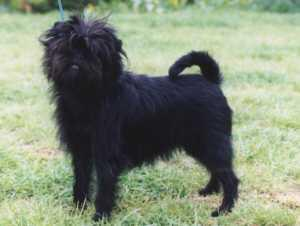

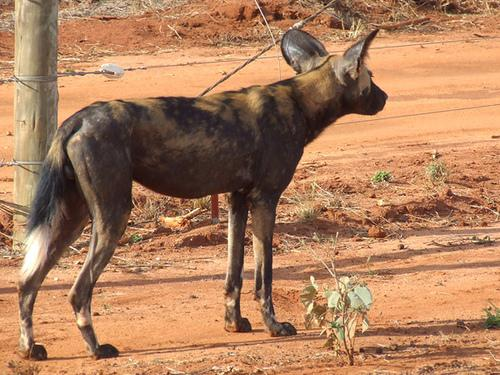

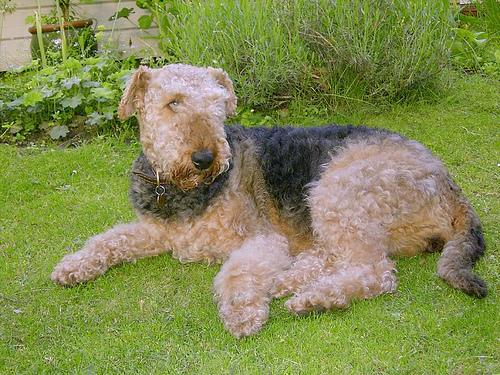

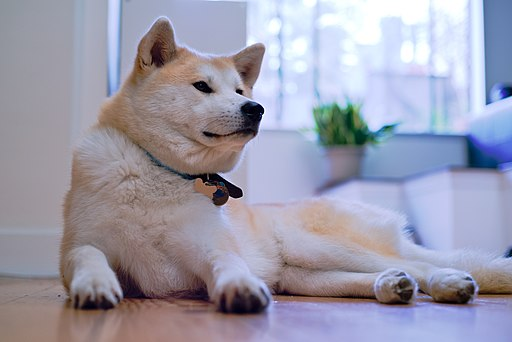

In [ ]:
from PIL import Image
from IPython.display import display
import io


BASE_URL = 'https://dog.ceo/api'


def get_all_dog_breeds():
    res = requests.get(BASE_URL+'/breeds/list/all')
    if res.status_code == 200:
        return list(res.json()['message'].keys())
    return None


def get_breed_image_url(breed):
    res = requests.get(f'https://dog.ceo/api/breed/{breed}/images/random')
    if res.status_code == 200:
        return res.json()['message']
    return None


def show_breed_image(breed):
    res_img = requests.get(get_breed_image_url(breed))
    if res_img.status_code == 200:
        img = Image.open(io.BytesIO(res_img.content))
        display(img)


print(', '.join(get_all_dog_breeds()))


breeds = input().split(', ')


for i in breeds:
    show_breed_image(i)